## Based on the sixth census what factors impact the life expectancy and how is the LE difference of regions in Mainland China?

#### CASA0007 Quantitative Method                                             

#### Student ID:21052137

## 1.import library

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

import numpy as np
import os
import scipy.stats as sps
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Circle, Rectangle, Arc
pd.set_option('display.max_rows', 300) # specifies number of rows to show
pd.options.display.float_format = '{:40,.4f}'.format # specifies default number format to 4 decimal places
plt.style.use('ggplot') # specifies that graphs should use ggplot styling
%matplotlib inline

## 2.upload data

In [2]:
url = 'https://github.com/JunqiHu23/CASA007-FINAL-PROJECT/raw/main/life%20expectancy_raw.csv'
df1 = pd.read_csv(url)
print(f"Data frame is {df1.shape[0]:,} x {df1.shape[1]}")

Data frame is 31 x 12


In [3]:
df1

,Regions,Life_Expectancy_in_2010,Male_Life_Expectancy_in_2010,Female_Life_Expectancy_in_2010,GDP_per_capita_in_2010_yuan,Resident_consumption_level_yuan,Health_technicians_per_10000_people,Number_of_health_care_facilities,Average_number_of_students_in_higher_institutions_per_100000_population,Education_expenditure_millionyuan,Average_elevation_metre,Annual_precipitation_millimetre
0,Beijing,80.1800,78.2800,82.2100,78307,24982,136,9411,6196,"61,344.4800",43.5000,500
1,Tianjing,78.8900,77.4200,80.4800,54053,17852,71,4542,4412,"29,209.7000",22.0000,600
2,Hebei,74.9700,72.7000,77.4700,25308,8057,40,81403,1951,"71,927.3400",509.0000,600
3,Shanxi,74.9200,72.8700,77.2800,25434,8447,56,41098,2132,"45,081.9500","1,160.0000",520
4,Neimenggu,74.4400,72.0400,77.2700,33262,10925,51,22565,1884,"41,437.3100",999.0000,220
5,Liaoning,76.3800,74.1200,78.8600,31888,13016,55,34805,2671,"62,426.1500",224.0000,800
6,Jiling,76.1800,74.1200,78.4400,23370,9241,51,19385,2716,"34,456.1100",404.0000,550
7,Heilongjiang,75.9800,73.5200,78.8100,21694,9121,50,22073,2447,"40,485.6500",313.0000,500
8,Shanghai,80.2600,78.2000,82.4400,79396,32271,97,4708,4300,"55,827.3600",4.0000,1124
9,Jiangsu,76.6300,74.6000,78.8100,52787,14035,44,30956,2819,"131,462.3300",15.0000,1000


In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Regions                                                                  31 non-null     object 
 1   Life_Expectancy_in_2010                                                  31 non-null     float64
 2   Male_Life_Expectancy_in_2010                                             31 non-null     float64
 3   Female_Life_Expectancy_in_2010                                           31 non-null     float64
 4   GDP_per_capita_in_2010_yuan                                              31 non-null     int64  
 5   Resident_consumption_level_yuan                                          31 non-null     int64  
 6   Health_technicians_per_10000_people                                      31 

In [5]:
df1.describe()

,Life_Expectancy_in_2010,Male_Life_Expectancy_in_2010,Female_Life_Expectancy_in_2010,GDP_per_capita_in_2010_yuan,Resident_consumption_level_yuan,Health_technicians_per_10000_people,Number_of_health_care_facilities,Average_number_of_students_in_higher_institutions_per_100000_population,Education_expenditure_millionyuan,Average_elevation_metre,Annual_precipitation_millimetre
count,31.0000,31.0000,31.0000,31.0000,31.0000,31.0000,31.0000,31.0000,31.0000,31.0000,31.0000
mean,74.9061,72.6297,77.4829,"31,180.4839","10,951.2581",48.6129,"30,223.4516","2,328.4194","56,140.3245",924.8548,910.8387
std,2.7476,2.7764,2.7751,"16,626.2210","5,874.4112",21.2958,"21,851.9882","1,046.0705","34,004.2443","1,156.9104",498.8484
min,68.1700,66.3300,70.0700,"12,882.0000","4,469.0000",25.0000,"4,129.0000","1,109.0000","6,622.9300",4.0000,154.0000
25%,74.3850,71.8050,76.9000,"21,462.0000","7,878.5000",36.0000,"16,747.5000","1,840.0000","36,627.7400",221.0000,510.0000
50%,74.9700,72.7000,77.5900,"24,984.0000","8,922.0000",44.0000,"26,673.0000","2,051.0000","51,436.3500",404.0000,800.0000
75%,76.3400,74.0250,78.9550,"34,430.5000","12,311.0000",52.0000,"35,250.5000","2,559.0000","63,701.1150","1,145.0000","1,300.0000"
max,80.2600,78.2800,82.4400,"79,396.0000","32,271.0000",136.0000,"81,403.0000","6,196.0000","153,273.4800","4,737.0000","1,800.0000"


## 3.Data Analysis

In [6]:
df2=df1.copy()

#### 3.1 Rename the variables

In [7]:
df2.rename(columns={'Life_Expectancy_in_2010':'LE_2010',
                    'Male_Life_Expectancy_in_2010':'Male_LE_2010',
                    'Female_Life_Expectancy_in_2010':'Female_LE_2010',
                    'GDP_per_capita_in_2010_yuan':'GDP',
                    'Resident_consumption_level_yuan':'RCL',
                    'Health_technicians_per_10000_people':'HT',
                    'Number_of_health_care_facilities':'HCF',
                    'Average_number_of_students_in_higher_institutions_per_100000_population':'SHI',
                    'Education_expenditure_millionyuan':'EE',
                    'Average_elevation_metre':'AE',
                    'Annual_precipitation_millimetre':'AP'},inplace = True)
df2

,Regions,LE_2010,Male_LE_2010,Female_LE_2010,GDP,RCL,HT,HCF,SHI,EE,AE,AP
0,Beijing,80.1800,78.2800,82.2100,78307,24982,136,9411,6196,"61,344.4800",43.5000,500
1,Tianjing,78.8900,77.4200,80.4800,54053,17852,71,4542,4412,"29,209.7000",22.0000,600
2,Hebei,74.9700,72.7000,77.4700,25308,8057,40,81403,1951,"71,927.3400",509.0000,600
3,Shanxi,74.9200,72.8700,77.2800,25434,8447,56,41098,2132,"45,081.9500","1,160.0000",520
4,Neimenggu,74.4400,72.0400,77.2700,33262,10925,51,22565,1884,"41,437.3100",999.0000,220
5,Liaoning,76.3800,74.1200,78.8600,31888,13016,55,34805,2671,"62,426.1500",224.0000,800
6,Jiling,76.1800,74.1200,78.4400,23370,9241,51,19385,2716,"34,456.1100",404.0000,550
7,Heilongjiang,75.9800,73.5200,78.8100,21694,9121,50,22073,2447,"40,485.6500",313.0000,500
8,Shanghai,80.2600,78.2000,82.4400,79396,32271,97,4708,4300,"55,827.3600",4.0000,1124
9,Jiangsu,76.6300,74.6000,78.8100,52787,14035,44,30956,2819,"131,462.3300",15.0000,1000


#### 3.2 Mapping the distribution of LE in China

<div style="border: dotted 1px rgb(156,121,26); padding: 10px; margin: 5px; background-color: rgb(255,236,184)"><i>Note</i>:Please 'pip install echarts-china-provinces-pypkg'</div>

In [8]:
import pandas as pd
from pyecharts.charts import Map,Geo
import pyecharts.options as opts

In [9]:
url = 'https://github.com/JunqiHu23/CASA007-FINAL-PROJECT/raw/main/life%20expectancy_map.csv'
df_map = pd.read_csv(url)
print(f"Data frame is {df_map.shape[0]:,} x {df_map.shape[1]}")

Data frame is 31 x 2


In [10]:
df_map

,Regions,LE_2010
0,北京,80.1800
1,天津,78.8900
2,河北,74.9700
3,山西,74.9200
4,内蒙古,74.4400
5,辽宁,76.3800
6,吉林,76.1800
7,黑龙江,75.9800
8,上海,80.2600
9,江苏,76.6300


In [11]:
map = Map()
map.add('',df_map[['Regions','LE_2010']].values.tolist(),"china")
map.set_global_opts(visualmap_opts=opts.VisualMapOpts(min_=67,max_=80))
map.render_notebook()

In [12]:
geo=Geo()
geo.add_schema(maptype="china")
geo.add('',[list(z) for z in zip(df_map.Regions,df_map.LE_2010)])
geo.set_series_opts(label_opts=opts.LabelOpts(is_show=False))
geo.set_global_opts(visualmap_opts=opts.VisualMapOpts(
    is_piecewise=True,
    pieces=[
        {"min":67,"max":70,"label":"67~70","color":"#FFCCCC"},
        {"min":70.01,"max":73,"label":"70~73","color":"#FF9999"},
        {"min":73.01,"max":76,"label":"73~76","color":"#FF6666"},
        {"min":76.01,"max":79,"label":"76~79","color":"#FF0000"},
        {"min":79.01,"max":82,"label":"79~82","color":"#990000"},
    ]   
))
geo .render_notebook() 

In [13]:
print(type(df2))

<class 'pandas.core.frame.DataFrame'>


In [14]:
df2.corr()

,LE_2010,Male_LE_2010,Female_LE_2010,GDP,RCL,HT,HCF,SHI,EE,AE,AP
LE_2010,1.0000,0.9899,0.9836,0.7764,0.7788,0.6540,0.0426,0.7683,0.4070,-0.8016,0.2432
Male_LE_2010,0.9899,1.0000,0.9484,0.8130,0.8053,0.7024,-0.0001,0.8178,0.3792,-0.7499,0.1529
Female_LE_2010,0.9836,0.9484,1.0000,0.7048,0.7199,0.5749,0.0872,0.6804,0.4245,-0.8438,0.3505
GDP,0.7764,0.8130,0.7048,1.0000,0.9638,0.8482,-0.2139,0.8208,0.3712,-0.4492,0.0656
RCL,0.7788,0.8053,0.7199,0.9638,1.0000,0.8277,-0.2218,0.7738,0.3394,-0.4623,0.1325
HT,0.6540,0.7024,0.5749,0.8482,0.8277,1.0000,-0.3232,0.8609,0.0640,-0.2786,-0.2282
HCF,0.0426,-0.0001,0.0872,-0.2139,-0.2218,-0.3232,1.0000,-0.2352,0.6078,-0.2059,0.1629
SHI,0.7683,0.8178,0.6804,0.8208,0.7738,0.8609,-0.2352,1.0000,0.1060,-0.4739,-0.0812
EE,0.4070,0.3792,0.4245,0.3712,0.3394,0.0640,0.6078,0.1060,1.0000,-0.4504,0.3893
AE,-0.8016,-0.7499,-0.8438,-0.4492,-0.4623,-0.2786,-0.2059,-0.4739,-0.4504,1.0000,-0.4209


In [15]:
df3=df2.sort_values(by="LE_2010",ascending=False)

In [16]:
df3

,Regions,LE_2010,Male_LE_2010,Female_LE_2010,GDP,RCL,HT,HCF,SHI,EE,AE,AP
8,Shanghai,80.2600,78.2000,82.4400,79396,32271,97,4708,4300,"55,827.3600",4.0000,1124
0,Beijing,80.1800,78.2800,82.2100,78307,24982,136,9411,6196,"61,344.4800",43.5000,500
1,Tianjing,78.8900,77.4200,80.4800,54053,17852,71,4542,4412,"29,209.7000",22.0000,600
10,Zhejiang,77.7300,75.5800,80.2100,51110,18274,61,29939,2285,"106,256.8800",303.0000,1400
9,Jiangsu,76.6300,74.6000,78.8100,52787,14035,44,30956,2819,"131,462.3300",15.0000,1000
18,Guangdong,76.4900,74.0000,79.3700,44669,17211,53,44880,2037,"153,273.4800",218.0000,1800
14,Shandong,76.4600,74.0500,79.0600,35599,11606,47,66967,2202,"103,959.0000",90.0000,710
5,Liaoning,76.3800,74.1200,78.8600,31888,13016,55,34805,2671,"62,426.1500",224.0000,800
20,Hainan,76.3000,73.2000,80.0100,23323,7553,44,4678,2036,"14,226.7300",191.0000,1639
6,Jiling,76.1800,74.1200,78.4400,23370,9241,51,19385,2716,"34,456.1100",404.0000,550


#### 3.3 bar chat of LE in each regions

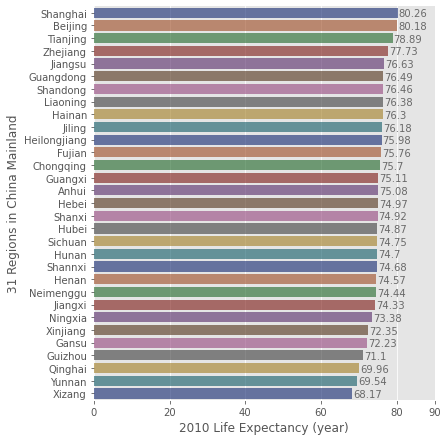

In [17]:
fig1= sns.catplot(
    data=df3, kind="bar",
    y="Regions", x="LE_2010",
     palette="dark", alpha=.6, height=6, orient="h")

# extract the matplotlib axes_subplot objects from the FacetGrid
ax = fig1.facet_axis(0, 0)
ax.set_xticks([0,20,40,60,80,90])
# iterate through the axes containers
for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_width()+.3, i.get_y()+.7,str(round((i.get_width()), 2)), fontsize=10,color='dimgrey')


fig1.despine(left=True)
fig1.set_axis_labels("2010 Life Expectancy (year)", "31 Regions in China Mainland")

#### 3.4 Check data

Text(0, 0.5, 'Variables')

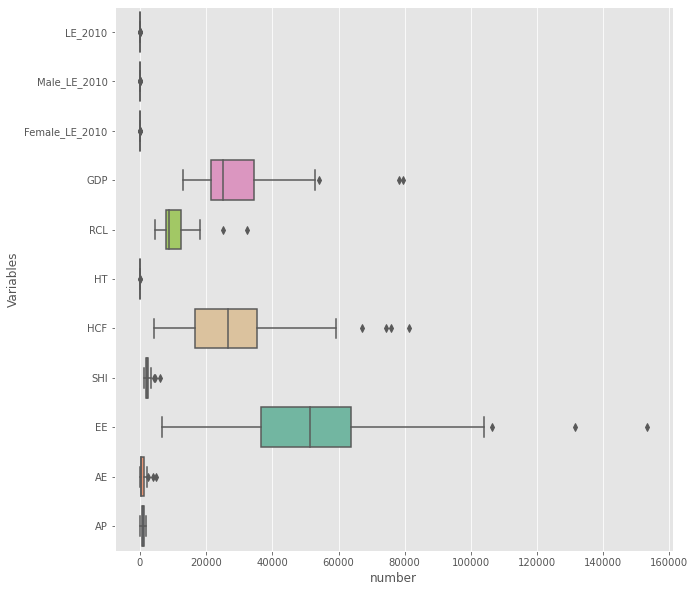

In [18]:
plt.figure(figsize=(10, 10))
ax = sns.boxplot(data=df3, orient="h", palette="Set2")
plt.xlabel('number')
plt.ylabel('Variables')

<AxesSubplot:>

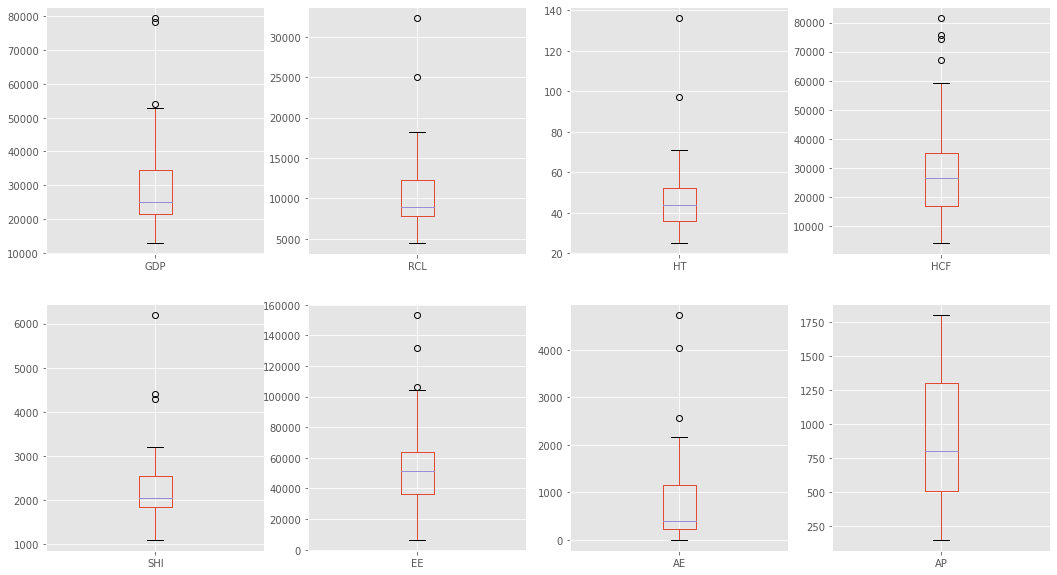

In [19]:
plt.figure(figsize=(18,10))


plt.subplot(2,4,1)
df3.GDP.plot.box()

plt.subplot(2,4,2)
df3.RCL.plot.box()

plt.subplot(2,4,3)
df3.HT.plot.box()

plt.subplot(2,4,4)
df3.HCF.plot.box()

plt.subplot(2,4,5)
df3.SHI.plot.box()

plt.subplot(2,4,6)
df3.EE.plot.box()

plt.subplot(2,4,7)
df3.AE.plot.box()

plt.subplot(2,4,8)
df3.AP.plot.box()

In [20]:
#df2["log_Life_Expectancy_in_2010"]=np.log(df2["Life_Expectancy_in_2010"])
#df2["log_GDP_per_capita_in_2010_yuan"]=np.log(df2["GDP_per_capita_in_2010_yuan"])
#df2["log_Resident_consumption_level_yuan"]=np.log(df2["Resident_consumption_level_yuan"])
#df2["log_Health_technicians_per_10000_people"]=np.log(df2["Health_technicians_per_10000_people"])
#df2["log_Number_of_health_care_facilities"]=np.log(df2["Number_of_health_care_facilities"])
#df2["log_Average_number_of_students_in_institutions_of_higher_learning_per_100000_population"]=np.log(df2["Average_number_of_students_in_institutions_of_higher_learning_per_100000_population"])
#df2["log_Education_funding_millionyuan"]=np.log(df2["Education_funding_millionyuan"])
#df2["log_Average_elevation_metre"]=np.log(df2["Average_elevation_metre"])
#df2["log_Annual_recipitation_millimetre"]=np.log(df2["Annual_recipitation_millimetre"])

<AxesSubplot:ylabel='Density'>

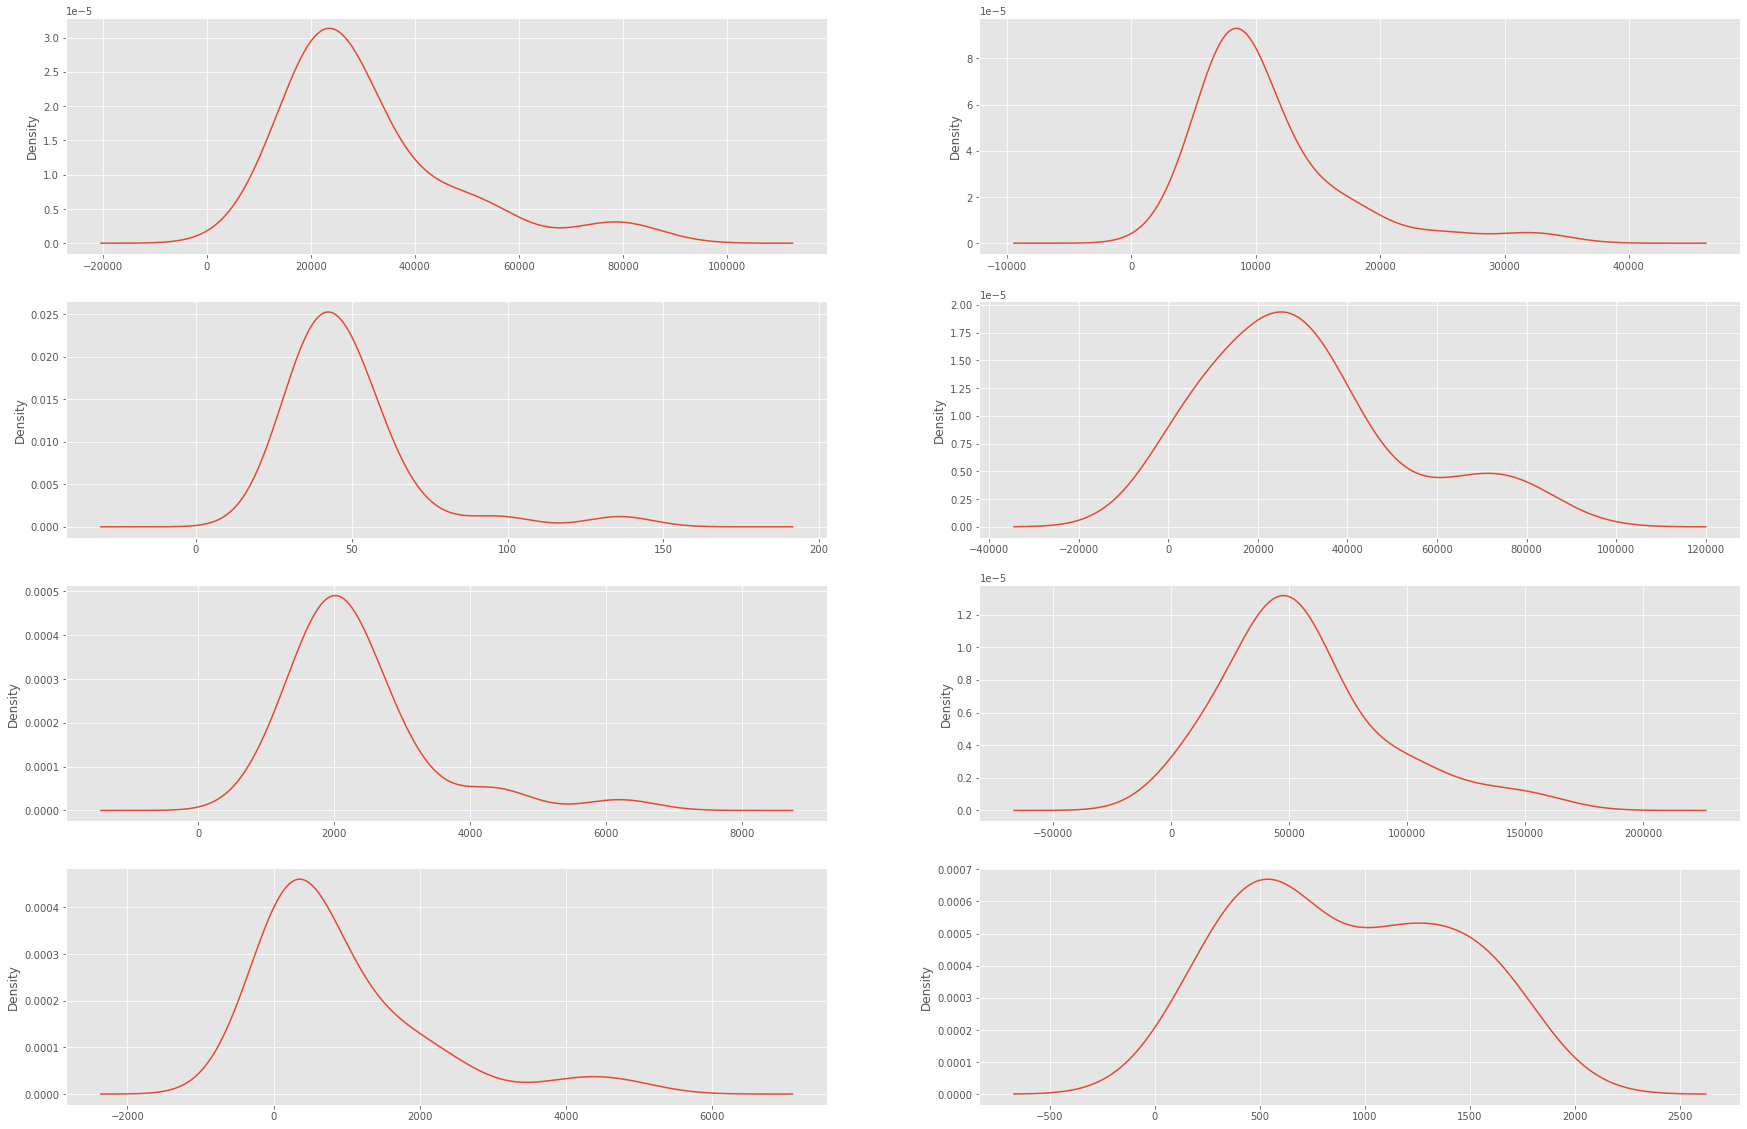

In [21]:
plt.figure(figsize=(30,20))


plt.subplot(4,2,1)
df3.GDP.plot.kde()

plt.subplot(4,2,2)
df3.RCL.plot.kde()

plt.subplot(4,2,3)
df3.HT.plot.kde()

plt.subplot(4,2,4)
df3.HCF.plot.kde()

plt.subplot(4,2,5)
df3.SHI.plot.kde()

plt.subplot(4,2,6)
df3.EE.plot.kde()

plt.subplot(4,2,7)
df3.AE.plot.kde()

plt.subplot(4,2,8)
df3.AP.plot.kde()

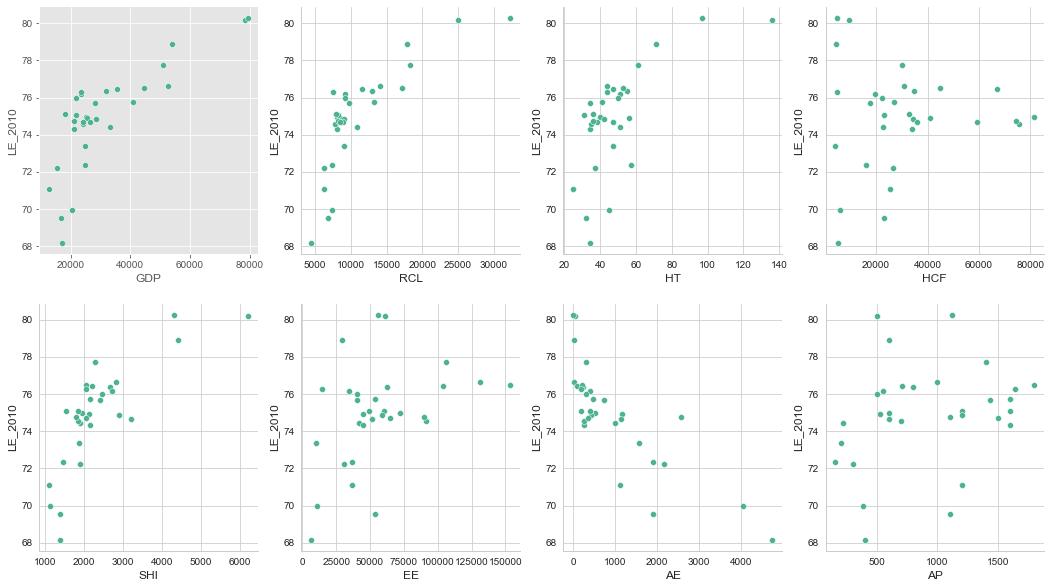

In [22]:
plt.figure(figsize=(18,10))


plt.subplot(2,4,1)
sns.set_style("whitegrid")
#plt.figure(figsize=(10,10))
#sns.set_theme(style="white")
sns.scatterplot(
    data=df2, x="GDP", y="LE_2010", 
    sizes=(20, 200), legend="full", color="#4CB391")
sns.despine()

plt.subplot(2,4,2)
sns.set_style("whitegrid")
#plt.figure(figsize=(10,10))
#sns.set_theme(style="white")
sns.scatterplot(
    data=df2, x="RCL", y="LE_2010", 
    sizes=(20, 200), legend="full", color="#4CB391")
sns.despine()

plt.subplot(2,4,3)
sns.set_style("whitegrid")
#plt.figure(figsize=(10,10))
#sns.set_theme(style="white")
sns.scatterplot(
    data=df2, x="HT", y="LE_2010", 
    sizes=(20, 200), legend="full", color="#4CB391")
sns.despine()


plt.subplot(2,4,4)
sns.set_style("whitegrid")
#plt.figure(figsize=(10,10))
#sns.set_theme(style="white")
sns.scatterplot(
    data=df2, x="HCF", y="LE_2010", 
    sizes=(20, 200), legend="full", color="#4CB391")
sns.despine()

plt.subplot(2,4,5)
sns.set_style("whitegrid")
#plt.figure(figsize=(10,10))
#sns.set_theme(style="white")
sns.scatterplot(
    data=df2, x="SHI", y="LE_2010", 
    sizes=(20, 200), legend="full", color="#4CB391")
sns.despine()

plt.subplot(2,4,6)
sns.set_style("whitegrid")
#plt.figure(figsize=(10,10))
#sns.set_theme(style="white")
sns.scatterplot(
    data=df2, x="EE", y="LE_2010", 
    sizes=(20, 200), legend="full", color="#4CB391")
sns.despine()

plt.subplot(2,4,7)
sns.set_style("whitegrid")
#plt.figure(figsize=(10,10))
#sns.set_theme(style="white")
sns.scatterplot(
    data=df2, x="AE", y="LE_2010", 
    sizes=(20, 200), legend="full", color="#4CB391")
sns.despine()

plt.subplot(2,4,8)
sns.set_style("whitegrid")
#plt.figure(figsize=(10,10))
#sns.set_theme(style="white")
sns.scatterplot(
    data=df2, x="AP", y="LE_2010", 
    sizes=(20, 200), legend="full", color="#4CB391")
sns.despine()

#### 3.4 Multiple Linear Regression

In [23]:
df4=df3.copy()

In [24]:
df4=df4.iloc[:,[1,4,5,6,7,8,9,10,11]]
df4

,LE_2010,GDP,RCL,HT,HCF,SHI,EE,AE,AP
8,80.2600,79396,32271,97,4708,4300,"55,827.3600",4.0000,1124
0,80.1800,78307,24982,136,9411,6196,"61,344.4800",43.5000,500
1,78.8900,54053,17852,71,4542,4412,"29,209.7000",22.0000,600
10,77.7300,51110,18274,61,29939,2285,"106,256.8800",303.0000,1400
9,76.6300,52787,14035,44,30956,2819,"131,462.3300",15.0000,1000
18,76.4900,44669,17211,53,44880,2037,"153,273.4800",218.0000,1800
14,76.4600,35599,11606,47,66967,2202,"103,959.0000",90.0000,710
5,76.3800,31888,13016,55,34805,2671,"62,426.1500",224.0000,800
20,76.3000,23323,7553,44,4678,2036,"14,226.7300",191.0000,1639
6,76.1800,23370,9241,51,19385,2716,"34,456.1100",404.0000,550


In [25]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 31 entries, 8 to 25
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LE_2010  31 non-null     float64
 1   GDP      31 non-null     int64  
 2   RCL      31 non-null     int64  
 3   HT       31 non-null     int64  
 4   HCF      31 non-null     int64  
 5   SHI      31 non-null     int64  
 6   EE       31 non-null     float64
 7   AE       31 non-null     float64
 8   AP       31 non-null     int64  
dtypes: float64(3), int64(6)
memory usage: 3.5 KB


In [26]:
df4.describe()

,LE_2010,GDP,RCL,HT,HCF,SHI,EE,AE,AP
count,31.0000,31.0000,31.0000,31.0000,31.0000,31.0000,31.0000,31.0000,31.0000
mean,74.9061,"31,180.4839","10,951.2581",48.6129,"30,223.4516","2,328.4194","56,140.3245",924.8548,910.8387
std,2.7476,"16,626.2210","5,874.4112",21.2958,"21,851.9882","1,046.0705","34,004.2443","1,156.9104",498.8484
min,68.1700,"12,882.0000","4,469.0000",25.0000,"4,129.0000","1,109.0000","6,622.9300",4.0000,154.0000
25%,74.3850,"21,462.0000","7,878.5000",36.0000,"16,747.5000","1,840.0000","36,627.7400",221.0000,510.0000
50%,74.9700,"24,984.0000","8,922.0000",44.0000,"26,673.0000","2,051.0000","51,436.3500",404.0000,800.0000
75%,76.3400,"34,430.5000","12,311.0000",52.0000,"35,250.5000","2,559.0000","63,701.1150","1,145.0000","1,300.0000"
max,80.2600,"79,396.0000","32,271.0000",136.0000,"81,403.0000","6,196.0000","153,273.4800","4,737.0000","1,800.0000"


###### 3.4.1 Correlation

In [27]:
df4.corr()

,LE_2010,GDP,RCL,HT,HCF,SHI,EE,AE,AP
LE_2010,1.0000,0.7764,0.7788,0.6540,0.0426,0.7683,0.4070,-0.8016,0.2432
GDP,0.7764,1.0000,0.9638,0.8482,-0.2139,0.8208,0.3712,-0.4492,0.0656
RCL,0.7788,0.9638,1.0000,0.8277,-0.2218,0.7738,0.3394,-0.4623,0.1325
HT,0.6540,0.8482,0.8277,1.0000,-0.3232,0.8609,0.0640,-0.2786,-0.2282
HCF,0.0426,-0.2139,-0.2218,-0.3232,1.0000,-0.2352,0.6078,-0.2059,0.1629
SHI,0.7683,0.8208,0.7738,0.8609,-0.2352,1.0000,0.1060,-0.4739,-0.0812
EE,0.4070,0.3712,0.3394,0.0640,0.6078,0.1060,1.0000,-0.4504,0.3893
AE,-0.8016,-0.4492,-0.4623,-0.2786,-0.2059,-0.4739,-0.4504,1.0000,-0.4209
AP,0.2432,0.0656,0.1325,-0.2282,0.1629,-0.0812,0.3893,-0.4209,1.0000


Text(0.5, 1.0, 'Correlation Matrix')

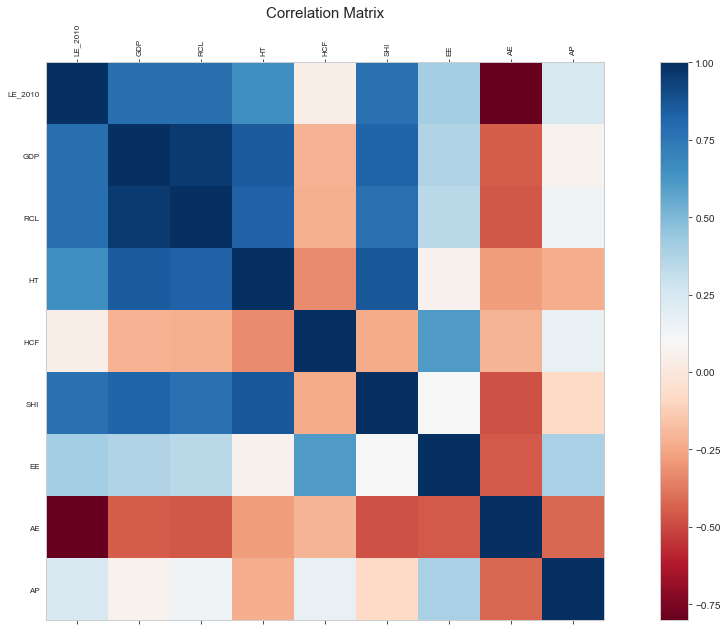

In [28]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(20, 10))
plt.matshow(df4.corr(), fignum=f.number,cmap=plt.cm.RdBu)
plt.xticks(range(df4.shape[1]), df4.columns, fontsize=8, rotation=90)
plt.yticks(range(df4.shape[1]), df4.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=15,pad=45)

###### 3.4.2 MLR

In [29]:
model_life_expectancy_1= sm.formula.ols('LE_2010 ~  GDP + RCL + HT + HCF + SHI + EE + AE + AP', df4).fit()
model_life_expectancy_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LE_2010   R-squared:                       0.889
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     22.05
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           8.24e-09
Time:                        17:15:33   Log-Likelihood:                -40.724
No. Observations:                  31   AIC:                             99.45
Df Residuals:                      22   BIC:                             112.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     71.9768      1.197     60.145      0.000      69.495      74.459
GDP         2.278e-05   5.87e-05      0.388      0.701   -9.89e-05       0.000
RCL            0.0001      0.000      0.821      0.421      -0.000       0.000
HT             0.0083      0.026      0.316      0.755      -0.046       0.063
HCF         1.701e-05    1.5e-05      1.132      0.270   -1.42e-05    4.82e-05
SHI            0.0006      0.000      1.196      0.244      -0.000       0.002
EE         -5.936e-06   1.18e-05     -0.503      0.620   -3.04e-05    1.85e-05
AE            -0.0012      0.000     -4.798      0.000      -0.002      -0.001
AP             0.0002      0.001      0.303      0.764      -0.001       0.001
==============================================================================
Omnibus:                        5.662   Durbin-Watson:                   2.122
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                4.508
Skew:                          -0.533   Prob(JB):                        0.105
Kurtosis:                       4.534   Cond. No.                     5.00e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large,  5e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

###### 3.4.3 Multicollinearity

In [30]:
# calculating VIF
# This function is adjusted from: https://stackoverflow.com/a/51329496/4667568
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break
    print(vif_df)
    return df

In [31]:
# using VIF on the df dataset

df_predictors_selected_VIF_4 = drop_column_using_vif_(df4.drop('LE_2010', axis=1))
# Note that there is a 'while' loop in the drop_column_using_vif_. In each iteration, one variable is dropped.
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF_4.columns)

Dropping: GDP
Dropping: HT
                                         VIF
RCL                                   3.9433
HCF                                   2.5041
SHI                                   3.4700
EE                                    3.0298
AE                                    2.0528
AP                                    1.5523
The columns remaining after VIF selection are:
Index(['RCL', 'HCF', 'SHI', 'EE', 'AE', 'AP'], dtype='object')


In [32]:
df4_VIF=df_predictors_selected_VIF_4

Text(0.5, 1.0, 'Correlation Matrix')

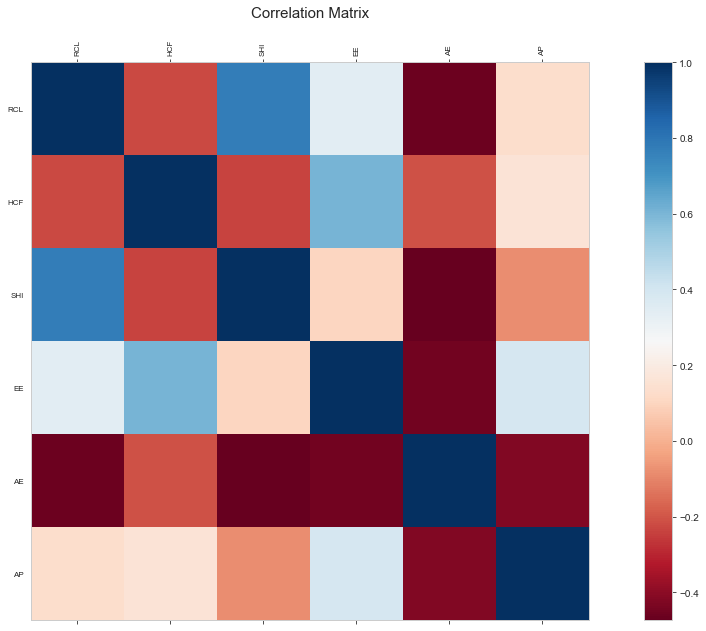

In [33]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(20,10))
plt.matshow(df4_VIF.corr(), fignum=f.number,cmap=plt.cm.RdBu)
plt.xticks(range(df4_VIF.shape[1]), df4_VIF.columns, fontsize=8, rotation=90)
plt.yticks(range(df4_VIF.shape[1]), df4_VIF.columns, fontsize=8)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=10)
plt.title('Correlation Matrix', fontsize=15,pad=45)

###### 3.4.4 MLR

In [45]:
model_life_expectancy_2 = sm.OLS(endog=df4[['LE_2010']], exog=sm.add_constant(df_predictors_selected_VIF_4)).fit()
model_life_expectancy_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                LE_2010   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     31.63
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           2.93e-10
Time:                        17:38:56   Log-Likelihood:                -40.914
No. Observations:                  31   AIC:                             95.83
Df Residuals:                      24   BIC:                             105.9
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.0548      1.092     65.985      0.000      69.801      74.309
RCL            0.0002   6.35e-05      2.800      0.010    4.67e-05       0.000
HCF         1.487e-05   1.36e-05      1.093      0.285   -1.32e-05     4.3e-05
SHI            0.0007      0.000      2.170      0.040    3.56e-05       0.001
EE         -3.745e-06   9.62e-06     -0.389      0.700   -2.36e-05    1.61e-05
AE            -0.0012      0.000     -4.976      0.000      -0.002      -0.001
AP          4.864e-05      0.000      0.104      0.918      -0.001       0.001
==============================================================================
Omnibus:                        6.516   Durbin-Watson:                   2.105
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                5.556
Skew:                          -0.599   Prob(JB):                       0.0622
Kurtosis:                       4.693   Cond. No.                     4.38e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.38e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
# Pick out some values of interest and print the regression equation:

beta_0, beta_1, beta_2, beta_3, beta_4, beta_5, beta_6= model_life_expectancy_2.params
rsq                    = model_life_expectancy_2.rsquared
pval_0, pval_1, pval_2, pval_3, pval_4, pval_5, pval_6 = model_life_expectancy_2.pvalues

print("y =", round(beta_1,5), "x1 +", round(beta_2,5), "x2 +", round(beta_3,5), "x3 +", round(beta_4,5), "x4 +", round(beta_5,5), "x5 +", round(beta_6,5), "x6 +", round(beta_0,5))
print("R^2     = ", rsq)
print("p-value_1 = ", round(pval_1,3))
print("p-value_2 = ", round(pval_2,3))
print("p-value_3 = ", round(pval_3,3))
print("p-value_4 = ", round(pval_4,3))
print("p-value_5 = ", round(pval_5,3))
print("p-value_6 = ", round(pval_6,3))

y = 0.00018 x1 + 1e-05 x2 + 0.00073 x3 + -0.0 x4 + -0.00116 x5 + 5e-05 x6 + 72.05479
R^2     =  0.8877347330881686
p-value_1 =  0.01
p-value_2 =  0.285
p-value_3 =  0.04
p-value_4 =  0.7
p-value_5 =  0.0
p-value_6 =  0.918


###### 3.4.5 Residual Analysis

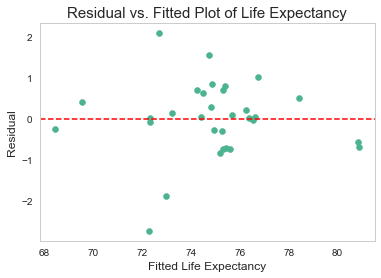

In [36]:
# plot 
plt.figure(figsize=(6,4))
plt.scatter(model_life_expectancy_2.fittedvalues, model_life_expectancy_2.resid,color='#4CB391')
# adding title and labels
plt.xlabel('Fitted Life Expectancy',fontsize=12)
plt.ylabel('Residual',fontsize=12)
plt.title('Residual vs. Fitted Plot of Life Expectancy',fontsize=15)
plt.axhline(0.0, color='r', linestyle='--', label='xxx')
plt.show()

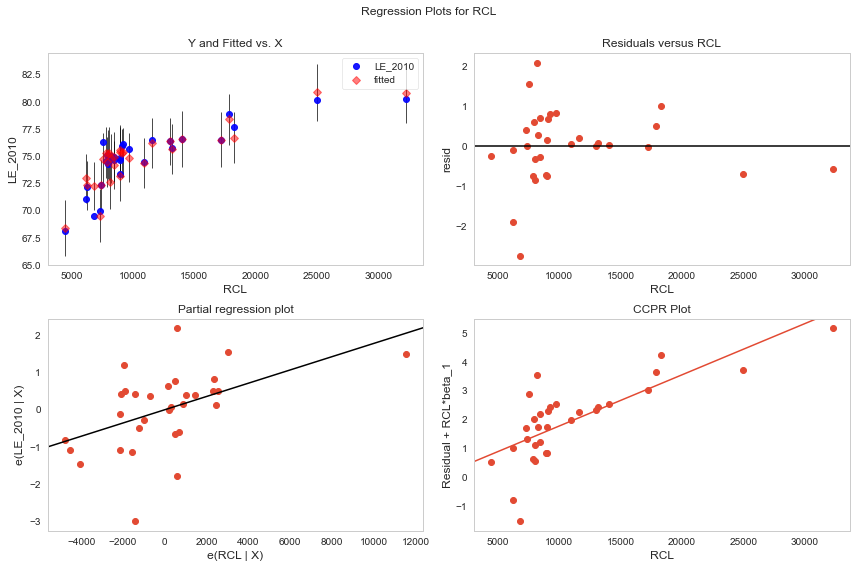

In [37]:
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_life_expectancy_2, 'RCL', fig=fig)

#### 3.5 Clustering

In [38]:
import chart_studio
chart_studio.tools.set_credentials_file(username='junqihu3', api_key='weUHB2McWfIpYPPBeDPf')

import chart_studio.plotly as py
import plotly.graph_objects as go
import plotly.figure_factory as ff 
import os

import pandas as pd 

In [39]:
from sklearn.cluster import KMeans, DBSCAN, OPTICS
c_nm   = 'KMeans' # Clustering name
k_pref = 3 # Number of clusters

kmeans = KMeans(n_clusters=k_pref, n_init=25, random_state=42).fit(df4) # The process

print(kmeans.labels_) # The results

[1 1 1 0 0 0 2 1 1 1 1 1 1 1 1 2 1 1 2 2 1 2 1 1 1 1 1 1 1 1 1]


.............................
Largest silhouette score was 0.5444 for k=5


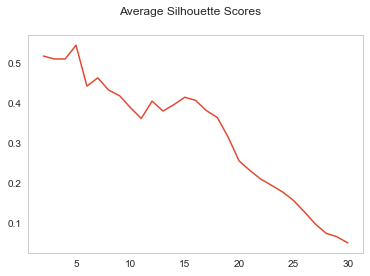

In [40]:

# Adapted from: http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html
from sklearn.metrics import silhouette_samples, silhouette_score

x = []
y = []

for k in range(2,31):
    
    #############
    # Do the clustering using the main columns
    kmeans = KMeans(n_clusters=k, n_init=25, random_state=42).fit(df4)
    
    # Calculate the overall silhouette score
    silhouette_avg = silhouette_score(df4, kmeans.labels_)
    
    y.append(k)
    x.append(silhouette_avg)
    
    print('.', end='')

print()
print(f"Largest silhouette score was {max(x):6.4f} for k={y[x.index(max(x))]}")

plt.plot(y, x)
plt.gcf().suptitle("Average Silhouette Scores");

In [42]:
X2 = df3[['LE_2010']]
fig = ff.create_dendrogram(X2, orientation='left',labels=list(df3["Regions"]),colorscale=('blue','red','green','cyan','grey','coral','lime','maroon','purple','pink'),color_threshold=1.5)
fig['layout'].update({'width':800, 'height':800})
py.iplot(fig, filename='dendrogram_with_labels')

In [43]:
X3 = df3[['RCL','HCF','SHI','EE','AE','AP']]
fig = ff.create_dendrogram(X1, orientation='left',labels=list(df3["Regions"]),colorscale=('blue','red','green','cyan','grey','coral','lime','maroon','purple','pink'),color_threshold=35000)
fig['layout'].update({'width':800, 'height':800})
py.iplot(fig, filename='dendrogram_with_labels')